In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
for i in df.columns:
    if i=="math_score" or i=='reading_score' or i=='writing_score':
        continue
    else:
        print(f"Categories in {i.upper()} : {df[i].unique()}")

Categories in GENDER : ['female' 'male']
Categories in RACE_ETHNICITY : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in PARENTAL_LEVEL_OF_EDUCATION : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in LUNCH : ['standard' 'free/reduced']
Categories in TEST_PREPARATION_COURSE : ['none' 'completed']


In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg_Score'] = df['Total_Score']/3
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Avg_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full = df[df['reading_score']==100]
writing_full = df[df['writing_score']==100]
math_full = df[df['math_score']==100]
print(f"Students with 100 in Reading: {len(reading_full)}")
print(f"Students with 100 in Writing: {len(writing_full)}")
print(f"Students with 100 in Maths {len(math_full)}")

Students with 100 in Reading: 17
Students with 100 in Writing: 14
Students with 100 in Maths 7


In [28]:
reading_20 = df[df['reading_score']<=20]
writing_20 = df[df['writing_score']<=20]
math_20 = df[df['math_score']<=20]
print(f"Students with less then 20 in Reading: {len(reading_20)}")
print(f"Students with less then 20 in Writing: {len(writing_20)}")
print(f"Students with less then 20 in Maths {len(math_20)}")

Students with less then 20 in Reading: 1
Students with less then 20 in Writing: 3
Students with less then 20 in Maths 4


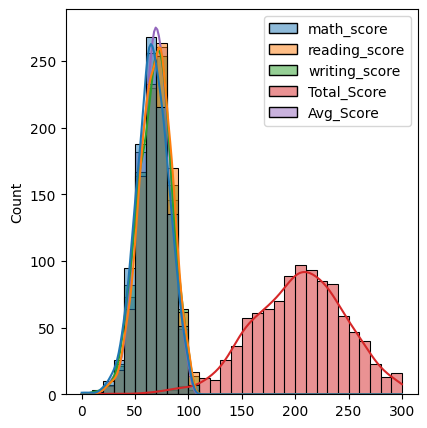

In [38]:
fig, axs = plt.subplots(1, 1,figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df,bins=30,kde=True,color='g')
plt.show()